# Loading data from survey and turning it into graphs   

In [175]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()
from config.configuration import DATA_FOLDER_PATH

In [247]:
# load data
survey = pd.read_csv(f"../../{DATA_FOLDER_PATH}/survey_data/CES-eCommerce-variation_03.15.csv")

gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_GPT-4o_averages.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_GPT-4o_raw_data.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_GPT-4o-mini_averages.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_GPT-4o-mini_raw_data.csv")
gpt4omini_raw.set_index("#", inplace=True)

gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_Gemini_averages.csv")
gemini_avg.set_index("#", inplace=True)
gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_Gemini_raw_data.csv")
gemini_raw.set_index("#", inplace=True)


In [214]:
survey

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Progress,Duration (in seconds),Unnamed: 5,RecordedDate,Unnamed: 7,DistributionChannel,Unnamed: 9,...,Q8_streaming,Q9_loyalty,Q10_return,Q11_VPN_prices,Q12_free_trials,Q13_not_reporting,Q14_subscritpion,Q15_fake_review,Q16_ad-blockers,Q17_website_errors
0,NaN,NaN,NaN,Progress,Duration (in seconds),NaN,Recorded Date,NaN,Distribution Channel,NaN,...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...
1,NaN,NaN,NaN,"{""ImportId"":""progress""}","{""ImportId"":""duration""}",NaN,"{""ImportId"":""recordedDate"",""timeZone"":""Europe/...",NaN,"{""ImportId"":""distributionChannel""}",NaN,...,"{""ImportId"":""QID8_3""}","{""ImportId"":""QID8_4""}","{""ImportId"":""QID10_1""}","{""ImportId"":""QID10_2""}","{""ImportId"":""QID10_3""}","{""ImportId"":""QID10_4""}","{""ImportId"":""QID7_1""}","{""ImportId"":""QID7_2""}","{""ImportId"":""QID7_3""}","{""ImportId"":""QID7_4""}"
2,NaN,NaN,NaN,100,295,NaN,1/5/25 12:14,NaN,anonymous,NaN,...,4,3,2,3,4,2,5,1,3,4
3,NaN,NaN,NaN,100,362,NaN,1/5/25 12:16,NaN,anonymous,NaN,...,4,5,1,4,3,3,3,1,3,5
4,NaN,NaN,NaN,100,318,NaN,1/5/25 12:19,NaN,anonymous,NaN,...,5,4,4,3,5,3,5,2,4,5
5,NaN,NaN,NaN,100,197,NaN,1/5/25 12:25,NaN,anonymous,NaN,...,5,4,1,5,5,3,5,1,5,3
6,NaN,NaN,NaN,100,364,NaN,1/5/25 12:28,NaN,anonymous,NaN,...,5,5,1,3,4,4,5,3,4,5
7,NaN,NaN,NaN,100,302,NaN,1/5/25 12:35,NaN,anonymous,NaN,...,2,2,1,4,4,2,2,1,2,4
8,NaN,NaN,NaN,100,281,NaN,1/5/25 12:39,NaN,anonymous,NaN,...,3,4,2,3,4,2,4,2,3,4
9,NaN,NaN,NaN,100,370,NaN,1/5/25 12:43,NaN,anonymous,NaN,...,3,5,5,5,5,1,5,1,3,3


In [215]:
survey = survey.drop(columns=[survey.columns[i] for i in [0, 1, 2, 5, 7, 9]])

In [216]:
survey = survey.drop(survey.columns[:12], axis=1)

In [218]:
column_oder = ["Q4_company-license", "Q14_subscritpion", "Q6_screenshots", "Q8_streaming", "Q16_ad-blockers", "Q2_VPN_bypass", 
               "Q11_VPN_prices", "Q12_free_trials", "Q7_bots", "Q5_status", "Q9_loyalty", "Q1_refunds", "Q15_fake_review", 
               "Q10_return", "Q17_website_errors", "Q3_honest_reviews", "Q13_not_reporting"]
survey = survey[column_oder]

In [220]:
survey = survey.drop([0, 1])

In [222]:
survey = survey.astype(int)

In [223]:
survey_avgs = survey.mean()

In [224]:
YLIM = (0, 5.9)
def make_graphs(
    df: pd.DataFrame, slices: list, labels: list, errors: pd.DataFrame, prefix: str
) -> list[plt.Figure]:
    images = []
    capsizes = {"downloading": 7, "passive": 3}
    default_capsize = 4
    def get_capsize(key):
        return capsizes.get(key, default_capsize)
    
    for sl, lbl in zip(slices, labels):
        fig, ax = plt.subplots()
        df.iloc[sl].plot(
            kind="bar",
            ylim=YLIM,
            yerr=errors,
            capsize=get_capsize(lbl),
            ecolor="darkred",
            color=["#5a9bd4"],
            ax=ax,
            title=lbl,
            xlabel="Question",
            ylabel="Avg Score",
            figsize=(10, 5),
            rot=0,
        ).legend([f"{prefix}"])
        fig.tight_layout()
        images.append(fig)
    return images

In [225]:
slices2 = [slice(0,4), slice(4, 9), slice(9, 14), slice(14,None)]
labels2 = ["RM", "SE", "TV", "DC"]
survey_errors = survey.sem()
error_std = survey.std()
n = survey.shape[0]
print(n)
sem = error_std/(n**0.5)

32


In [226]:
survey_errors

Q4_company-license    0.208123
Q14_subscritpion      0.196924
Q6_screenshots        0.207517
Q8_streaming          0.250000
Q16_ad-blockers       0.173539
Q2_VPN_bypass         0.164116
Q11_VPN_prices        0.194995
Q12_free_trials       0.202989
Q7_bots               0.190169
Q5_status             0.178197
Q9_loyalty            0.210606
Q1_refunds            0.148815
Q15_fake_review       0.152990
Q10_return            0.167630
Q17_website_errors    0.166499
Q3_honest_reviews     0.102729
Q13_not_reporting     0.187500
dtype: float64

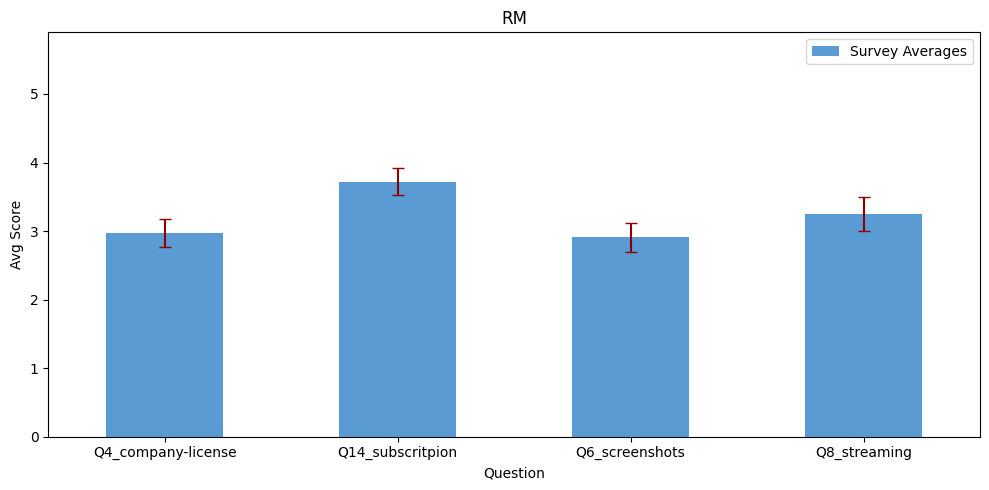

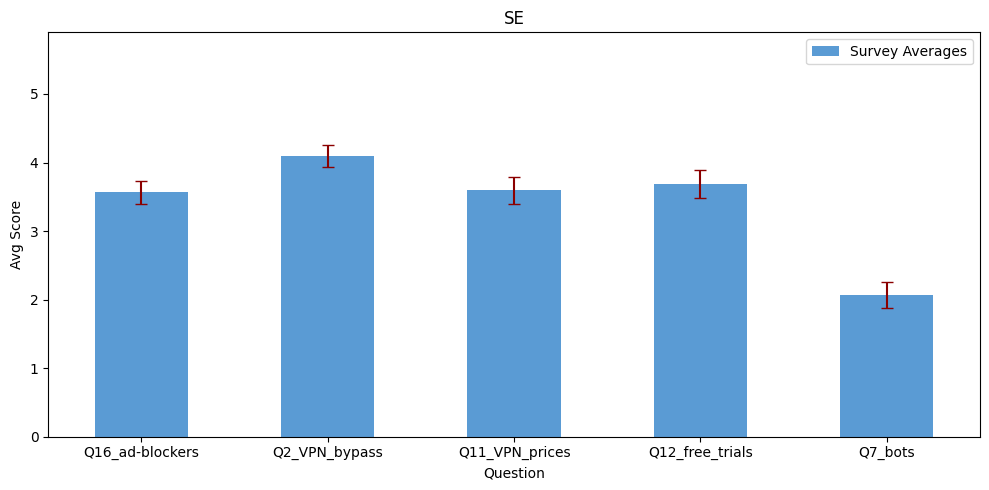

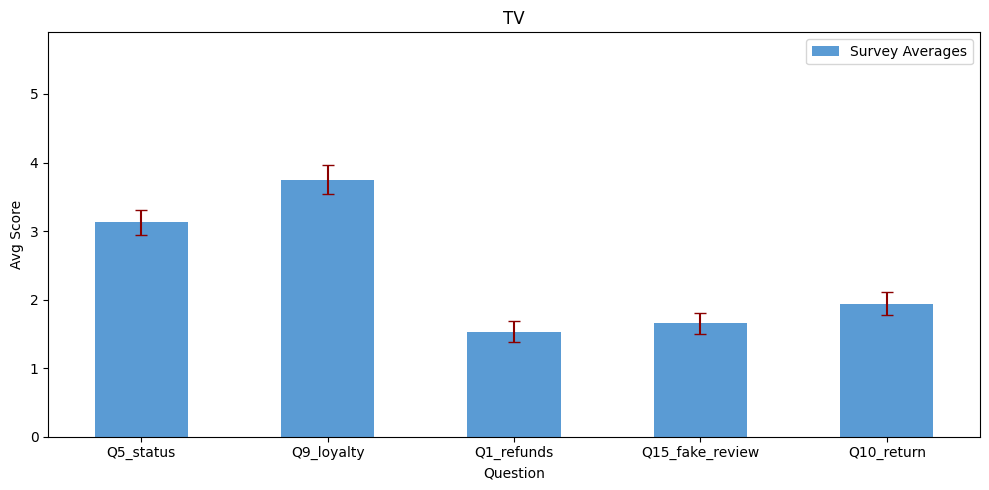

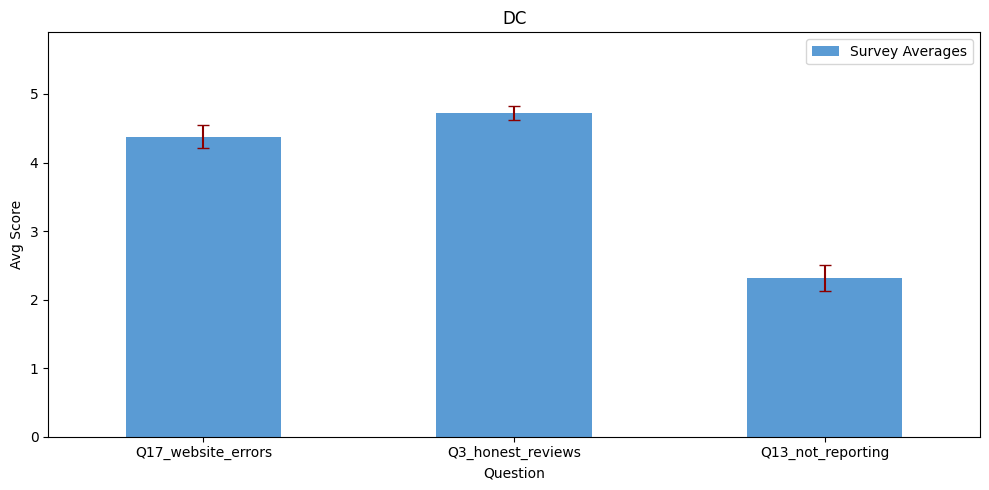

In [227]:
images = make_graphs(survey_avgs, slices2, labels2, survey_errors, prefix="Survey Averages")

In [228]:
survey_avgs

Q4_company-license    2.96875
Q14_subscritpion      3.71875
Q6_screenshots        2.90625
Q8_streaming          3.25000
Q16_ad-blockers       3.56250
Q2_VPN_bypass         4.09375
Q11_VPN_prices        3.59375
Q12_free_trials       3.68750
Q7_bots               2.06250
Q5_status             3.12500
Q9_loyalty            3.75000
Q1_refunds            1.53125
Q15_fake_review       1.65625
Q10_return            1.93750
Q17_website_errors    4.37500
Q3_honest_reviews     4.71875
Q13_not_reporting     2.31250
dtype: float64

In [229]:
gpt4o_avg

,Average,std
#,,
1,1.00,0.000000
2,1.15,0.358870
3,1.01,0.100000
4,1.00,0.000000
5,2.12,0.326599
6,3.01,0.173787
7,2.00,0.246183
8,1.13,0.337998
9,1.26,0.440844


In [230]:
columns = ["GPT-4o", "GPT-4o-mini", "Gemini", "Humans"]

category_averages = pd.DataFrame(index=labels2, columns=columns)
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices2]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices2]
# category_averages["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices2]
category_averages["Humans"] = [survey_avgs.values[s].mean() for s in slices2]

category_errors = pd.DataFrame(index=labels2, columns=columns)
category_errors["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices2]
category_errors["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices2]
# category_errors["Gemini"] = [gemini_avg.iloc[s, 1].mean() for s in slices2]
category_errors["Humans"] = [survey_errors.values[s].mean() for s in slices2]

In [231]:
# convert std to sem 
for sl in slices2:
    category_errors["GPT-4o"] = category_errors["GPT-4o"] / (n**0.5)
    category_errors["GPT-4o-mini"] = category_errors["GPT-4o-mini"] / (n**0.5)
    # category_errors["Gemini"] = category_errors["Gemini"] / (n**0.5)


In [232]:
category_averages

,GPT-4o,GPT-4o-mini,Gemini,Humans
RM,1.040000,1.185,NaN,3.210938
SE,1.904000,2.116,NaN,3.400000
TV,1.260000,1.202,NaN,2.400000
DC,3.663333,3.670,NaN,3.802083


In [233]:
survey_avgs.values

array([2.96875, 3.71875, 2.90625, 3.25   , 3.5625 , 4.09375, 3.59375,
       3.6875 , 2.0625 , 3.125  , 3.75   , 1.53125, 1.65625, 1.9375 ,
       4.375  , 4.71875, 2.3125 ])

In [234]:
category_errors


,GPT-4o,GPT-4o-mini,Gemini,Humans
RM,0.000112,0.000108,NaN,0.215641
SE,0.000298,0.000316,NaN,0.185162
TV,0.000116,0.000020,NaN,0.171648
DC,0.000033,0.000033,NaN,0.152242


<Axes: title={'center': 'Average Responses per Category'}, xlabel='Category', ylabel='Avg Score'>

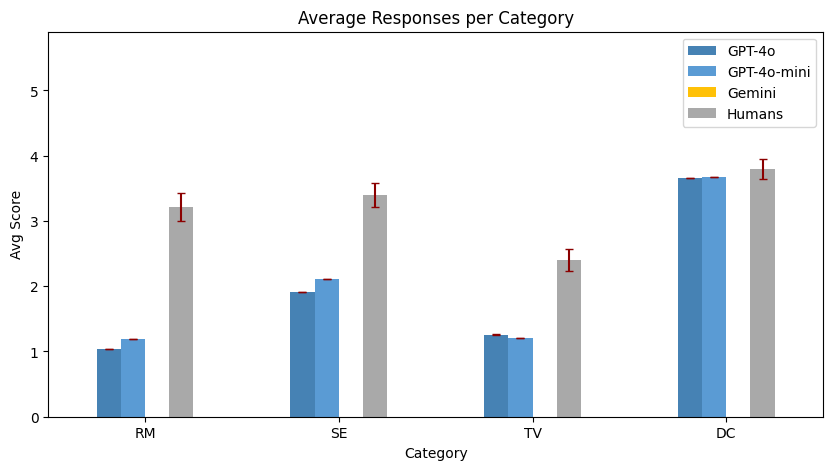

In [235]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#4682b4", "#5a9bd4", "#FFC107", "#A9A9A9"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

In [242]:
column_oder2 = ["Q1_refunds", "Q15_fake_review", "Q7_bots", "Q5_status", "Q9_loyalty", "Q10_return", "Q13_not_reporting", 
                "Q4_company-license", "Q16_ad-blockers", "Q2_VPN_bypass", "Q11_VPN_prices",   "Q14_subscritpion", "Q12_free_trials", 
                "Q6_screenshots", "Q8_streaming", "Q3_honest_reviews", "Q17_website_errors",]
survey2 = survey[column_oder2]
survey2_avgs = survey2.mean()
survey2_errors = survey2.sem()

In [239]:
survey2_avgs

Q1_refunds            1.53125
Q15_fake_review       1.65625
Q7_bots               2.06250
Q5_status             3.12500
Q9_loyalty            3.75000
Q10_return            1.93750
Q13_not_reporting     2.31250
Q4_company-license    2.96875
Q16_ad-blockers       3.56250
Q2_VPN_bypass         4.09375
Q11_VPN_prices        3.59375
Q14_subscritpion      3.71875
Q12_free_trials       3.68750
Q6_screenshots        2.90625
Q8_streaming          3.25000
Q3_honest_reviews     4.71875
Q17_website_errors    4.37500
dtype: float64

In [251]:
slices3 = [slice(0,6), slice(6,7), slice(7,9), slice(9,13), slice(13,15), slice(15, None)]
labels3 = ["active", "passive", "questionable", "no harm", "downloading", "doing good"]

In [241]:
for sl in slices3:
    print(survey2_avgs.iloc[sl])


Q1_refunds         1.53125
Q15_fake_review    1.65625
Q7_bots            2.06250
Q5_status          3.12500
Q9_loyalty         3.75000
Q10_return         1.93750
dtype: float64
Q13_not_reporting    2.3125
dtype: float64
Q4_company-license    2.96875
Q16_ad-blockers       3.56250
dtype: float64
Q2_VPN_bypass       4.09375
Q11_VPN_prices      3.59375
Q14_subscritpion    3.71875
Q12_free_trials     3.68750
dtype: float64
Q6_screenshots    2.90625
Q8_streaming      3.25000
dtype: float64
Q3_honest_reviews     4.71875
Q17_website_errors    4.37500
dtype: float64


In [249]:
gpt4o_avg

,Average,std
#,,
12,1.00,0.000000
13,1.00,0.000000
9,1.26,0.440844
10,1.00,0.000000
11,2.28,0.451261
14,1.02,0.140705
17,1.00,0.000000
1,1.00,0.000000
5,2.12,0.326599


In [246]:
order = [12, 13, 9, 10, 11, 14, 17, 1, 5, 6, 7, 2, 8, 3, 4, 16, 15]

Average    1.0
std        0.0
Name: 1, dtype: float64


In [253]:
columns = ["GPT-4o", "GPT-4o-mini", "Gemini", "Humans"]

category_averages2 = pd.DataFrame(index=labels3, columns=columns)
category_averages2["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices3]
category_averages2["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices3]
# category_averages2["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices3]
category_averages2["Humans"] = [survey2_avgs.values[s].mean() for s in slices3]

category_errors2 = pd.DataFrame(index=labels3, columns=columns)
category_errors2["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices3]
category_errors2["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices3]
# category_errors2["Gemini"] = [gemini_avg.iloc[s, 1].mean() for s in slices3]
category_errors2["Humans"] = [survey2_errors.values[s].mean() for s in slices3]

In [257]:
category_averages2

,GPT-4o,GPT-4o-mini,Gemini,Humans
active,1.2600,1.203333,NaN,2.343750
passive,1.0000,1.010000,NaN,2.312500
questionable,1.5600,1.880000,NaN,3.265625
no harm,1.8225,2.087500,NaN,3.773438
downloading,1.0050,1.000000,NaN,3.078125
doing good,4.9950,5.000000,NaN,4.546875


<Axes: title={'center': 'Average Responses per Category'}, xlabel='Category', ylabel='Avg Score'>

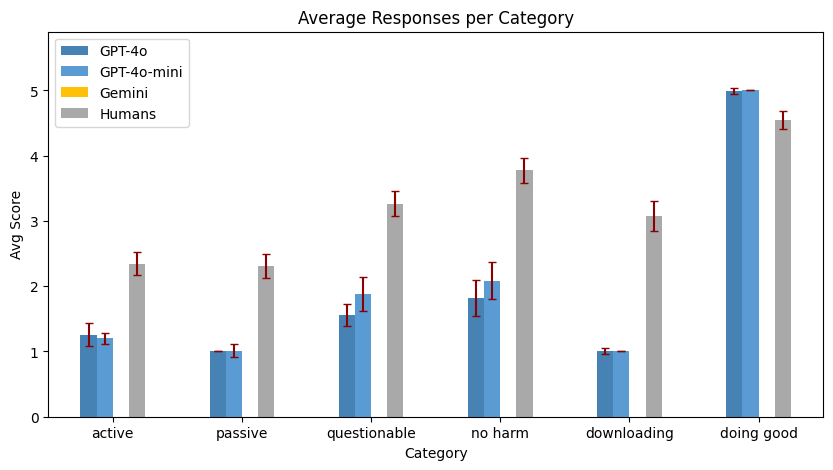

In [256]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages2.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors2,
    capsize=3,
    ecolor="darkred",
    color=["#4682b4", "#5a9bd4", "#FFC107", "#A9A9A9"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)